<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#придадим-объектам-редкого-класса-(1)-больший-вес-гиперпараметром-class_weight='balanced'" data-toc-modified-id="придадим-объектам-редкого-класса-(1)-больший-вес-гиперпараметром-class_weight='balanced'-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>придадим объектам редкого класса (1) больший вес гиперпараметром class_weight='balanced'</a></span></li><li><span><a href="#для-лучшей-балансировки-увеличим-объекты-редкого-класса-для-моделей" data-toc-modified-id="для-лучшей-балансировки-увеличим-объекты-редкого-класса-для-моделей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>для лучшей балансировки увеличим объекты редкого класса для моделей</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#проведем-тестирование" data-toc-modified-id="проведем-тестирование-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>проведем тестирование</a></span></li><li><span><a href="#исследуем-метрику-AUC-ROC" data-toc-modified-id="исследуем-метрику-AUC-ROC-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>исследуем метрику AUC-ROC</a></span></li></ul></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.

Построим модель с предельно большим значением *F1*-меры.

Дополнительно измерим *AUC-ROC*, сравним её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

Описание данных
Признаки  
RowNumber — индекс строки в данных  
CustomerId — уникальный идентификатор клиента  
Surname — фамилия  
CreditScore — кредитный рейтинг  
Geography — страна проживания  
Gender — пол  
Age — возраст  
Tenure — сколько лет человек является клиентом банка  
Balance — баланс на счёте  
NumOfProducts — количество продуктов банка, используемых клиентом  
HasCrCard — наличие кредитной карты  
IsActiveMember — активность клиента  
EstimatedSalary — предполагаемая зарплата   

Целевой признак     
Exited — факт ухода клиента   

## Подготовка данных

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#для пропуска предупреждения
import warnings
warnings.filterwarnings("ignore")

In [ ]:
dt_bnk = pd.read_csv('/datasets/Churn.csv')

In [ ]:
dt_bnk.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [ ]:
dt_bnk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [ ]:
# в стобце Tenure небольшое кол-во пропусков заполним минимальным значением
dt_bnk['Tenure'] = dt_bnk['Tenure'].fillna(0)

In [ ]:
#удалю столбцы,информация в которых не понадобиться для обучения модели
dt_bnk = dt_bnk.drop(['RowNumber','CustomerId', 'Surname'], axis=1)

In [ ]:
dt_bnk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


In [ ]:
#смотрим дубликаты
dt_bnk.duplicated().sum()

0

In [ ]:
#посмотрим значения столбца Geography
dt_bnk['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
#а также столбца Gender
dt_bnk['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
#вызовем метод OHE, чтоб убрать категориальные признаки и избежать дамми ловушку
#dt_bnk = pd.get_dummies(dt_bnk, drop_first=True)

In [ ]:
dt_bnk.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Вывод. Мы рассмотрели и обработали представленные данные.Заполнили пропуски и убрали ненужные столбцы-стало  11 столбцов и 10тыс. строк.После мы перевели строковые значения в числовые, избавившись от категориальных признаков- столбец Geography содержал 3 класса, Gender_Male 2 класса — в результате мы получили только 2 и 1 столбцов соответственно.Можно приступить к формированию выборок для работы с моделями.

## Исследование задачи

In [ ]:
#по условию посмотрим имеется ли дисбаланс в целевом признаке
ex_0_1 = dt_bnk['Exited'].value_counts(normalize=True)
ex_0_1

0    0.7963
1    0.2037
Name: Exited, dtype: float64

мы наблюдаме дисбаланс примерно 80 (это 0) и 20 проц.(это 1) пока проведем обучение без учета дисбаланса, в дальнейшем в другом разделе
применим методы для учета дисбаланса в построении моделей

In [ ]:
#создадим выборки - фичи(признаки) и целевой признак
features = dt_bnk.drop('Exited', axis=1)
target = dt_bnk['Exited']

In [ ]:
#разобьем эти выборки на тренировочные и валидационные
train_features,ttv_features,train_target,ttv_target=train_test_split(features,target,test_size=0.4,random_state=1234)

In [ ]:
test_features,valid_features,test_target,valid_target=train_test_split(ttv_features,ttv_target,test_size=0.5,random_state=1234)

In [ ]:
#вызовем метод OHE, чтоб убрать категориальные признаки и избежать дамми ловушку
train_features = pd.get_dummies(train_features, drop_first=True)
valid_features = pd.get_dummies(valid_features, drop_first=True)
test_features = pd.get_dummies(test_features, drop_first=True)

In [ ]:
#приведем численные признаки к одинаковой шкале
numeric=['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']
scaler=StandardScaler()
scaler.fit(train_features[numeric])
train_features[numeric]=scaler.transform(train_features[numeric])
valid_features[numeric]=scaler.transform(valid_features[numeric])
test_features[numeric]=scaler.transform(test_features[numeric])

In [ ]:
valid_features.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
1697,0.329707,-0.863705,1.109168,0.547963,0.82058,-1.545288,-1.014776,-1.305510,0,0,1
6830,1.172352,0.384655,1.429613,1.302837,0.82058,-1.545288,-1.014776,0.638615,0,0,1
5933,-0.841775,0.192600,-0.172613,0.698742,-0.91243,0.647128,-1.014776,1.100816,0,0,1
6206,1.552570,1.152877,0.788723,-1.227139,-0.91243,-1.545288,0.985439,-1.028388,0,1,1
7501,0.309155,1.825071,1.109168,0.265181,-0.91243,0.647128,0.985439,0.693606,0,0,0


In [ ]:
train_features.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2761,-0.050511,1.056849,0.468277,1.099985,0.82058,0.647128,0.985439,-1.255439,1,0,1
2792,-1.191165,0.576710,-0.813504,-1.227139,0.82058,-1.545288,0.985439,1.230899,0,0,0
4308,-0.101892,0.096572,0.788723,-1.227139,-0.91243,0.647128,-1.014776,0.471368,0,0,0
8376,-0.512938,0.000544,-0.493058,-0.063577,-0.91243,0.647128,-1.014776,-1.012334,0,0,1
831,0.586611,0.192600,0.147832,-1.227139,-0.91243,-1.545288,0.985439,0.993810,0,1,0


In [ ]:
#обучим модель Дерево решения и найдем лучший гиперпараметр

best_result = 0

for depth in range(1,20,1):
    model_tree=DecisionTreeClassifier(max_depth=depth,random_state=1234)
    model_tree=model_tree.fit(train_features,train_target)
    prediction=model_tree.predict(valid_features)
    print('max_depth:',depth,'F1:',f1_score(valid_target,prediction))
    result = f1_score(valid_target,prediction)
    if best_result < result:
        best_result = result
        max_depth = depth


print("Лучшая F-мера", best_result, 'значение глубины =', max_depth)

max_depth: 1 F1: 0.0
max_depth: 2 F1: 0.5327978580990628
max_depth: 3 F1: 0.4165232358003442
max_depth: 4 F1: 0.4928909952606636
max_depth: 5 F1: 0.5103668261562999
max_depth: 6 F1: 0.5411061285500747
max_depth: 7 F1: 0.5694822888283378
max_depth: 8 F1: 0.5698924731182796
max_depth: 9 F1: 0.5636114911080711
max_depth: 10 F1: 0.5305039787798408
max_depth: 11 F1: 0.5199485199485201
max_depth: 12 F1: 0.5242966751918158
max_depth: 13 F1: 0.5139393939393939
max_depth: 14 F1: 0.5030376670716888
max_depth: 15 F1: 0.49881796690307323
max_depth: 16 F1: 0.47857142857142854
max_depth: 17 F1: 0.47953216374269003
max_depth: 18 F1: 0.47897196261682246
max_depth: 19 F1: 0.48139534883720925
Лучшая F-мера 0.5698924731182796 значение глубины = 8


лучшее значение max_depth=8, при котором F1=0,5698

In [ ]:
#обучим модель Случайный лес и найдем лучший гиперпараметр
best_result = 0
best_est = 0
best_depth = 0
for estimator in range(10, 50, 2):
    for max_depth in range(10,20,3):
        model_forest=RandomForestClassifier(max_depth=depth,n_estimators=estimator,random_state=1234)
        model_forest=model_forest.fit(train_features,train_target)
        prediction=model_forest.predict(valid_features)
        print('estimators:', estimator, 'max_depth:', max_depth,'F1:',f1_score(valid_target,prediction))
        result = f1_score(valid_target,prediction)
        if best_result < result:
            best_result = result
            best_depth = depth
            best_est = estimator
print("Лучшая F-мера", best_result, 'при глубине = {0} и количестве деревьев = {1}'.format(best_depth, best_est))

estimators: 10 max_depth: 10 F1: 0.56150506512301
estimators: 10 max_depth: 13 F1: 0.56150506512301
estimators: 10 max_depth: 16 F1: 0.56150506512301
estimators: 10 max_depth: 19 F1: 0.56150506512301
estimators: 12 max_depth: 10 F1: 0.5611510791366906
estimators: 12 max_depth: 13 F1: 0.5611510791366906
estimators: 12 max_depth: 16 F1: 0.5611510791366906
estimators: 12 max_depth: 19 F1: 0.5611510791366906
estimators: 14 max_depth: 10 F1: 0.5606936416184971
estimators: 14 max_depth: 13 F1: 0.5606936416184971
estimators: 14 max_depth: 16 F1: 0.5606936416184971
estimators: 14 max_depth: 19 F1: 0.5606936416184971
estimators: 16 max_depth: 10 F1: 0.5660919540229885
estimators: 16 max_depth: 13 F1: 0.5660919540229885
estimators: 16 max_depth: 16 F1: 0.5660919540229885
estimators: 16 max_depth: 19 F1: 0.5660919540229885
estimators: 18 max_depth: 10 F1: 0.5734870317002881
estimators: 18 max_depth: 13 F1: 0.5734870317002881
estimators: 18 max_depth: 16 F1: 0.5734870317002881
estimators: 18 max_d

лучшее значение max_depth: 19 F1: 0.5955 и количестве деревьев = 46

In [ ]:
#обучим модель Логистическая регрессия
model_log=LogisticRegression(random_state=1234,solver='liblinear')
model_log.fit(train_features,train_target)
prediction=model_log.predict(valid_features)
print('F1:',f1_score(valid_target,prediction))


F1: 0.33333333333333337


Вывод: мы исследовали задачу заведомо зная, что присутствует дисбаланс в данных. Были задействовали три модели Дерево решения, Случайный лес и Логистическая регрессия. Сравнив их метрики F1,можно сделать вывод, что самая лучшая модель оказалась Случайный лес. При лучшем значении max_depth 19   и количестве деревьев = 46, мы имеем F1 меру =0.5955 на валидационной выборке.

## Борьба с дисбалансом

### придадим объектам редкого класса (1) больший вес гиперпараметром class_weight='balanced'   

In [ ]:
#сначала для дерева решений
best_result = 0

for depth in range(1,20,1):
    model_tree=DecisionTreeClassifier(max_depth=depth,random_state=1234,class_weight='balanced')
    model_tree=model_tree.fit(train_features,train_target)
    prediction=model_tree.predict(valid_features)
    print('max_depth:',depth,'F1:',f1_score(valid_target,prediction))
    result = f1_score(valid_target,prediction)
    if best_result < result:
        best_result = result
        max_depth = depth


print("Лучшая F-мера", best_result, 'значение глубины =', max_depth)

max_depth: 1 F1: 0.5129151291512916
max_depth: 2 F1: 0.5385996409335726
max_depth: 3 F1: 0.5385996409335726
max_depth: 4 F1: 0.5727029438001785
max_depth: 5 F1: 0.5800711743772242
max_depth: 6 F1: 0.5871559633027523
max_depth: 7 F1: 0.5809352517985612
max_depth: 8 F1: 0.5684024713150927
max_depth: 9 F1: 0.5621033544877606
max_depth: 10 F1: 0.5525525525525526
max_depth: 11 F1: 0.5417075564278705
max_depth: 12 F1: 0.5300429184549357
max_depth: 13 F1: 0.5186766275346851
max_depth: 14 F1: 0.5005324813631523
max_depth: 15 F1: 0.5148514851485148
max_depth: 16 F1: 0.5240761478163495
max_depth: 17 F1: 0.5186020293122886
max_depth: 18 F1: 0.5135746606334842
max_depth: 19 F1: 0.5159817351598174
Лучшая F-мера 0.5871559633027523 значение глубины = 6


In [ ]:
# модель Случайный лес
best_result = 0
best_est = 0
best_depth = 0
for estimator in range(10, 50, 2):
    for max_depth in range(10,20,3):
        model_forest=RandomForestClassifier(max_depth=depth,n_estimators=estimator,random_state=1234,class_weight='balanced')
        model_forest=model_forest.fit(train_features,train_target)
        prediction=model_forest.predict(valid_features)
        print('estimators:', estimator, 'max_depth:', max_depth,'F1:',f1_score(valid_target,prediction))
        result = f1_score(valid_target,prediction)
        if best_result < result:
            best_result = result
            best_depth = depth
            best_est = estimator
print("Лучшая F-мера", best_result, 'при глубине = {0} и количестве деревьев = {1}'.format(best_depth, best_est))

estimators: 10 max_depth: 10 F1: 0.514792899408284
estimators: 10 max_depth: 13 F1: 0.514792899408284
estimators: 10 max_depth: 16 F1: 0.514792899408284
estimators: 10 max_depth: 19 F1: 0.514792899408284
estimators: 12 max_depth: 10 F1: 0.5333333333333332
estimators: 12 max_depth: 13 F1: 0.5333333333333332
estimators: 12 max_depth: 16 F1: 0.5333333333333332
estimators: 12 max_depth: 19 F1: 0.5333333333333332
estimators: 14 max_depth: 10 F1: 0.5370919881305637
estimators: 14 max_depth: 13 F1: 0.5370919881305637
estimators: 14 max_depth: 16 F1: 0.5370919881305637
estimators: 14 max_depth: 19 F1: 0.5370919881305637
estimators: 16 max_depth: 10 F1: 0.5476190476190476
estimators: 16 max_depth: 13 F1: 0.5476190476190476
estimators: 16 max_depth: 16 F1: 0.5476190476190476
estimators: 16 max_depth: 19 F1: 0.5476190476190476
estimators: 18 max_depth: 10 F1: 0.5558823529411765
estimators: 18 max_depth: 13 F1: 0.5558823529411765
estimators: 18 max_depth: 16 F1: 0.5558823529411765
estimators: 18 m

In [ ]:
# модель Логистическая регрессия
model_log=LogisticRegression(random_state=1234,solver='liblinear',class_weight='balanced')
model_log.fit(train_features,train_target)
prediction=model_log.predict(valid_features)
print('F1:',f1_score(valid_target,prediction))

F1: 0.5223488168273445


с балансировкой результат у Логистической регресси заметно вырос, у  Дерево решений немного, а вот у Случайный лес немного снизился

### для лучшей балансировки увеличим объекты редкого класса для моделей

In [ ]:
#применим методы увеличения
def upsampling (features,target,repeat):
    target_one=target[target==1]
    target_null=target[target==0]
    features_one=features[target==1]
    features_null=features[target==0]
    upsampling_features=pd.concat([features_null]+[features_one]*repeat)
    upsampling_target=pd.concat([target_null]+[target_one]*repeat)
    upsampling_features,upsampling_target=shuffle(upsampling_features,upsampling_target,random_state=1234)

    return upsampling_features,upsampling_target

In [ ]:
up_features,up_target=upsampling(train_features,train_target,4)

In [ ]:
# Дерево решений
best_result = 0

for depth in range(1,20,1):
    model_tree=DecisionTreeClassifier(max_depth=depth,random_state=1234,class_weight='balanced')
    model_tree=model_tree.fit(up_features,up_target)
    prediction=model_tree.predict(valid_features)
    print('max_depth:',depth,'F1:',f1_score(valid_target,prediction))
    result = f1_score(valid_target,prediction)
    if best_result < result:
        best_result = result
        max_depth = depth


print("Лучшая F-мера", best_result, 'значение глубины =', max_depth)

max_depth: 1 F1: 0.5129151291512916
max_depth: 2 F1: 0.5385996409335726
max_depth: 3 F1: 0.5385996409335726
max_depth: 4 F1: 0.5727029438001785
max_depth: 5 F1: 0.5800711743772242
max_depth: 6 F1: 0.5871559633027523
max_depth: 7 F1: 0.5770964833183049
max_depth: 8 F1: 0.5658709106984969
max_depth: 9 F1: 0.5647058823529413
max_depth: 10 F1: 0.5490981963927856
max_depth: 11 F1: 0.5349065880039332
max_depth: 12 F1: 0.5262032085561498
max_depth: 13 F1: 0.5173160173160173
max_depth: 14 F1: 0.5131578947368421
max_depth: 15 F1: 0.5169300225733634
max_depth: 16 F1: 0.5163472378804961
max_depth: 17 F1: 0.5186020293122886
max_depth: 18 F1: 0.5114155251141553
max_depth: 19 F1: 0.4994192799070848
Лучшая F-мера 0.5871559633027523 значение глубины = 6


In [ ]:
# модель Случайный лес
best_result = 0
best_est = 0
best_depth = 0
for estimator in range(10, 50, 2):
    for max_depth in range(10,20,3):
        model_forest=RandomForestClassifier(max_depth=depth,n_estimators=estimator,random_state=1234,class_weight='balanced')
        model_forest=model_forest.fit(up_features,up_target)
        prediction=model_forest.predict(valid_features)
        print('estimators:', estimator, 'max_depth:', max_depth,'F1:',f1_score(valid_target,prediction))
        result = f1_score(valid_target,prediction)
        if best_result < result:
            best_result = result
            best_depth = depth
            best_est = estimator
print("Лучшая F-мера", best_result, 'при глубине = {0} и количестве деревьев = {1}'.format(best_depth, best_est))

estimators: 10 max_depth: 10 F1: 0.5830164765525983
estimators: 10 max_depth: 13 F1: 0.5830164765525983
estimators: 10 max_depth: 16 F1: 0.5830164765525983
estimators: 10 max_depth: 19 F1: 0.5830164765525983
estimators: 12 max_depth: 10 F1: 0.601522842639594
estimators: 12 max_depth: 13 F1: 0.601522842639594
estimators: 12 max_depth: 16 F1: 0.601522842639594
estimators: 12 max_depth: 19 F1: 0.601522842639594
estimators: 14 max_depth: 10 F1: 0.6104725415070242
estimators: 14 max_depth: 13 F1: 0.6104725415070242
estimators: 14 max_depth: 16 F1: 0.6104725415070242
estimators: 14 max_depth: 19 F1: 0.6104725415070242
estimators: 16 max_depth: 10 F1: 0.601522842639594
estimators: 16 max_depth: 13 F1: 0.601522842639594
estimators: 16 max_depth: 16 F1: 0.601522842639594
estimators: 16 max_depth: 19 F1: 0.601522842639594
estimators: 18 max_depth: 10 F1: 0.6007702182284982
estimators: 18 max_depth: 13 F1: 0.6007702182284982
estimators: 18 max_depth: 16 F1: 0.6007702182284982
estimators: 18 max_d

In [ ]:
# модель Логистическая регрессия
model_log=LogisticRegression(random_state=1234,solver='liblinear',class_weight='balanced')
model_log.fit(up_features,up_target)
prediction=model_log.predict(valid_features)
print('F1:', f1_score(valid_target,prediction))

F1: 0.5223488168273445


Вывод. Мы использовали разные возможности для борьбы с дисбалансом -использовав специальный гиперпараметр, а также метод увеличения объектов редкого класса. Можно отметить, что у модели Случайный лес при глубине = 19 и количестве деревьев = 34 параметр F-мера вырос и стал 0.6118 , что соответствет и даже немного превышает целевой согласно заданию.

## Тестирование модели

### проведем тестирование

In [ ]:
#задействуем специально выделенную тестовую выборку на лучшей модели

#best_result = 0
#best_est = 0
#best_depth = 0
#for estimator in range(10, 50, 2):
    #for max_depth in range(10,20,3):
        #model_forest=RandomForestClassifier(max_depth=depth,n_estimators=estimator,random_state=1234,class_weight='balanced')
        #model_forest=model_forest.fit(up_features,up_target)
        #prediction=model_forest.predict(test_features)
        #print('estimators:', estimator, 'max_depth:', max_depth,'F1:',f1_score(test_target,prediction))
        #result = f1_score(test_target,prediction)
        #if best_result < result:
            #best_result = result
            #best_depth = depth
            #best_est = estimator
#print("Лучшая F-мера", best_result, 'при глубине = {0} и количестве деревьев = {1}'.format(best_depth, best_est))


In [ ]:
#print('f1 модели на тестовой выборке', best_result)

In [ ]:
#тестовая выборка на лучшей модели
model_forest=RandomForestClassifier(max_depth=10,n_estimators=34,class_weight='balanced',random_state=1234)
model_forest=model_forest.fit(up_features,up_target)
prediction=model_forest.predict(test_features)
print('F1:', f1_score(test_target,prediction))

F1: 0.5906362545018008


### исследуем метрику AUC-ROC

In [ ]:
probabilities_valid_tr = model_tree.predict_proba(test_features)
probabilities_one_valid_tr = probabilities_valid_tr[:, 1]
fpr_tr, tpr_tr, thresholds = roc_curve(test_target, probabilities_one_valid_tr)

In [ ]:
auc_roc = roc_auc_score(test_target, probabilities_one_valid_tr)
auc_roc

0.6858058314118017

In [ ]:
probabilities_valid_lg = model_log.predict_proba(test_features)
probabilities_one_valid_lg = probabilities_valid_lg[:, 1]
fpr_log, tpr_log, thresholds = roc_curve(test_target, probabilities_one_valid_lg)

In [ ]:
auc_roc = roc_auc_score(test_target, probabilities_one_valid_lg)
auc_roc

0.7653416832617127

In [ ]:
probabilities_valid = model_forest.predict_proba(test_features)
probabilities_one_valid = probabilities_valid[:, 1]
fpr_fr, tpr_fr, thresholds = roc_curve(test_target, probabilities_one_valid)

In [ ]:
auc_roc = roc_auc_score(test_target, probabilities_one_valid)
auc_roc

0.8524042618698249

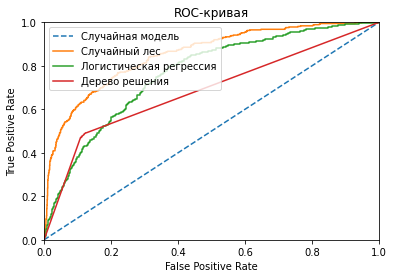

In [ ]:
plt.figure()
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_fr, tpr_fr)
plt.plot(fpr_log, tpr_log)
plt.plot(fpr_tr, tpr_tr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(('Случайная модель','Случайный лес','Логистическая регрессия','Дерево решения'),
           loc= 'upper left')
plt.show()


Общий вывод. Нами рассмотрены и обработаны полученные данные. С использованием разных методов проанализированы три модели  LogisticRegression, DecisionTreeClassifier, RandomForestClassifier. Лучшей по показателям стала модель RandomForestClassifier(Случайный лес): f1 модели на тестовой выборке 0.5906, метрика auc_roc=0.8524. На построенном по тестовым данным графике наглядно видно преимущество модели над двумя другими. Данную модель с наибольшими метриками можно использовать для прогнозирования оттока клиентов банка на основе исторических данных поведения клиентов.
